# Fun with Statistics

## Import packages (there are quite a few to run several statistical analysis)

In [12]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

## Import Data

In [4]:
olympicEvents = pd.read_csv('olympicEvents.csv')

In [5]:
olympicEvents.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Data Wrangling

In [6]:
olympicEvents.dropna(inplace=True)

## Single Sample t-Test

### Is the average age different from 22?

### Test Assumptions - Is the data normally distributed?

<Axes: >

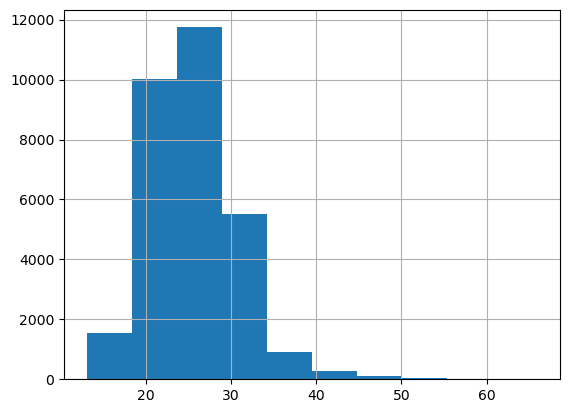

In [8]:
olympicEvents['Age'].hist()

### Not perfectly normal, but decent. So proceeding.

## Run the analysis

### First a single sample t-test

In [11]:
stats.ttest_1samp(olympicEvents['Age'], 22)

C:\Users\Amanda\AppData\Local\Temp\ipykernel_25936\2102114920.py:1: DeprecationWarning: Please use `ttest_1samp` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_1samp(olympicEvents['Age'], 22)


TtestResult(statistic=117.96999514411488, pvalue=0.0, df=30180)

### Deprication warning. Need to import ttest_1samp from scipy.stats and rerun to have the code for later use.

In [13]:
ttest_1samp(olympicEvents['Age'],22)

TtestResult(statistic=117.96999514411488, pvalue=0.0, df=30180)

### The p-value of 0 means that there is significant difference from 22.

In [14]:
olympicEvents.Age.mean()

25.42901162983334

### Calculating the mean shows that the average age is actually significantly higher than 22 at 25.4.

### Now, an Independent t-test

### Does the average age differ between men and women?

### Test Assumptions - Normally Distributed (First male then female)

<Axes: >

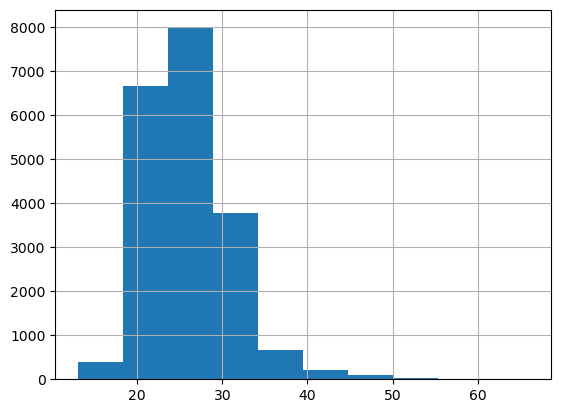

In [15]:
olympicEvents.Age[olympicEvents.Sex == 'M'].hist()

<Axes: >

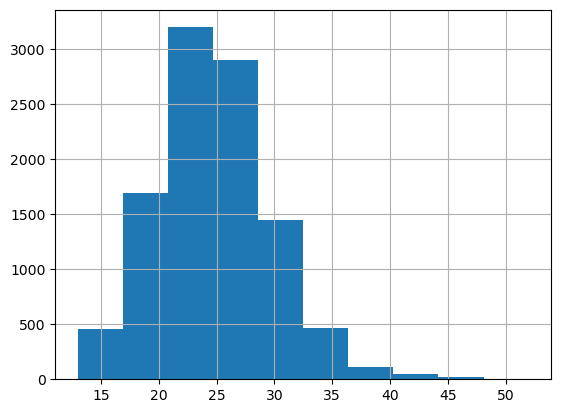

In [16]:
olympicEvents.Age[olympicEvents.Sex == 'F'].hist()

### Both look halfway decent. So proceeding.

## Run Analysis

In [17]:
ttest_ind(olympicEvents.Age[olympicEvents.Sex == 'M'], olympicEvents.Age[olympicEvents.Sex == 'F'] )

Ttest_indResult(statistic=20.811905071131516, pvalue=1.5853311644818236e-95)

### The p-vlaue is extremely small, therefore there is difference.

In [18]:
olympicEvents.groupby('Sex')['Age'].mean()

Sex
F    24.597585
M    25.862942
Name: Age, dtype: float64

### Looks like the average age for females is 24.6, while the average age for males is 25.9.

## Indpendent Chi-square

### Create a cross-tab first to see if the season influences the type of medal

In [19]:
crosstab = pd.crosstab(olympicEvents['Season'], olympicEvents['Medal'])
crosstab

Medal,Bronze,Gold,Silver
Season,,,
Summer,8566,8542,8233
Winter,1582,1625,1633


In [21]:
chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=3.4745101681496746, pvalue=0.17600285120006448, dof=2, expected_freq=array([[8520.60793214, 8536.56098207, 8283.83108578],
       [1627.39206786, 1630.43901793, 1582.16891422]]))

### Looking at the p-value, there does not appear to be a relation in season with expected medals.

## Correlation

In [22]:
olympicEvents['Height'].corr(olympicEvents['Weight'])

0.8018308248560181

## Both variables go up together (positive number) and the number is relatively high, so there is a strong correlation between height and weight.

### Visual relationship

<Axes: >

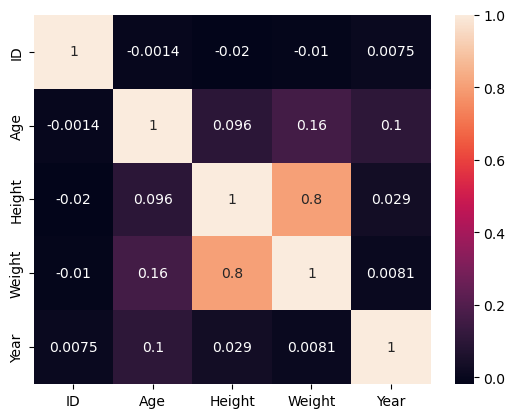

In [25]:
sns.heatmap(olympicEvents.corr(numeric_only=True), annot=True)

### Age and ID really don't mean antyhing, but we do see the height-weigth correlation here. Not much else looks to be of interest.